In [ ]:
import numpy as np
import torch
from Visualization import plotVectorAllTime_Compare, return_Indexes
from joblib import load
from load_Data import return_SplitTypes
import pandas as pd

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [ ]:
latent_type = 'PCA'
seed_num = 0

data_name = 'ZB'
split_types, test_tpsS = return_SplitTypes(data_name)
models = ['scIMF', 'scNODE', 'PI-SDE', 'MIOFlow', 'PRESCIENT']

In [ ]:
split_type = 'remove_recovery'


endesS = []
for model_name in models:
    if model_name == 'scIMF':
        res_filename = '../Output-{}-0.5-512/{}/{}/seed_{}/{}/results.npy'.format(latent_type, data_name, split_type, seed_num, 'Ours')
    else:
        res_filename = 'Output-{}/{}/{}/seed_{}/{}/results.npy'.format(latent_type, data_name, split_type, seed_num, model_name)
    results = np.load(res_filename, allow_pickle=True).item()
    true_data = results["true_latent"]
    all_tps = results["tps"]['all']
    train_tps = results["tps"]['train']
    test_tps = results["tps"]['test']
    endes = results["endes_latent"]
    endes = [each.detach().numpy() if isinstance(each, torch.Tensor) else each for each in endes]
    endesS.append(endes)

true_data = [each.detach().numpy() if isinstance(each, torch.Tensor) else each for each in true_data]
true_cell_tps = np.concatenate([np.repeat(t, each.shape[0]) for t, each in enumerate(true_data)])

DR_dir = res_filename.rsplit('/',2)[0] + '/' + 'UMAP.joblib'
loaded_model = load(DR_dir)
umap_model = loaded_model["umap"]

true_umap = umap_model.transform( np.concatenate(true_data, axis=0) )
endes_umapS = [ umap_model.transform( np.concatenate(endes, axis=0) ) for endes in endesS]

if data_name == 'ZB':
    meta_data = pd.read_csv("../Data/ZB/processed/meta_data.csv",header=0, index_col=0)
    cell_types =  meta_data['celltype'].values
elif data_name == 'MEF':
    cell_types = None
elif data_name == 'Panc':
    meta_data = pd.read_csv("../Data/Panc/new_processed/meta_data.csv",header=0, index_col=0)
    cell_types =  meta_data['Assigned_cluster'].values


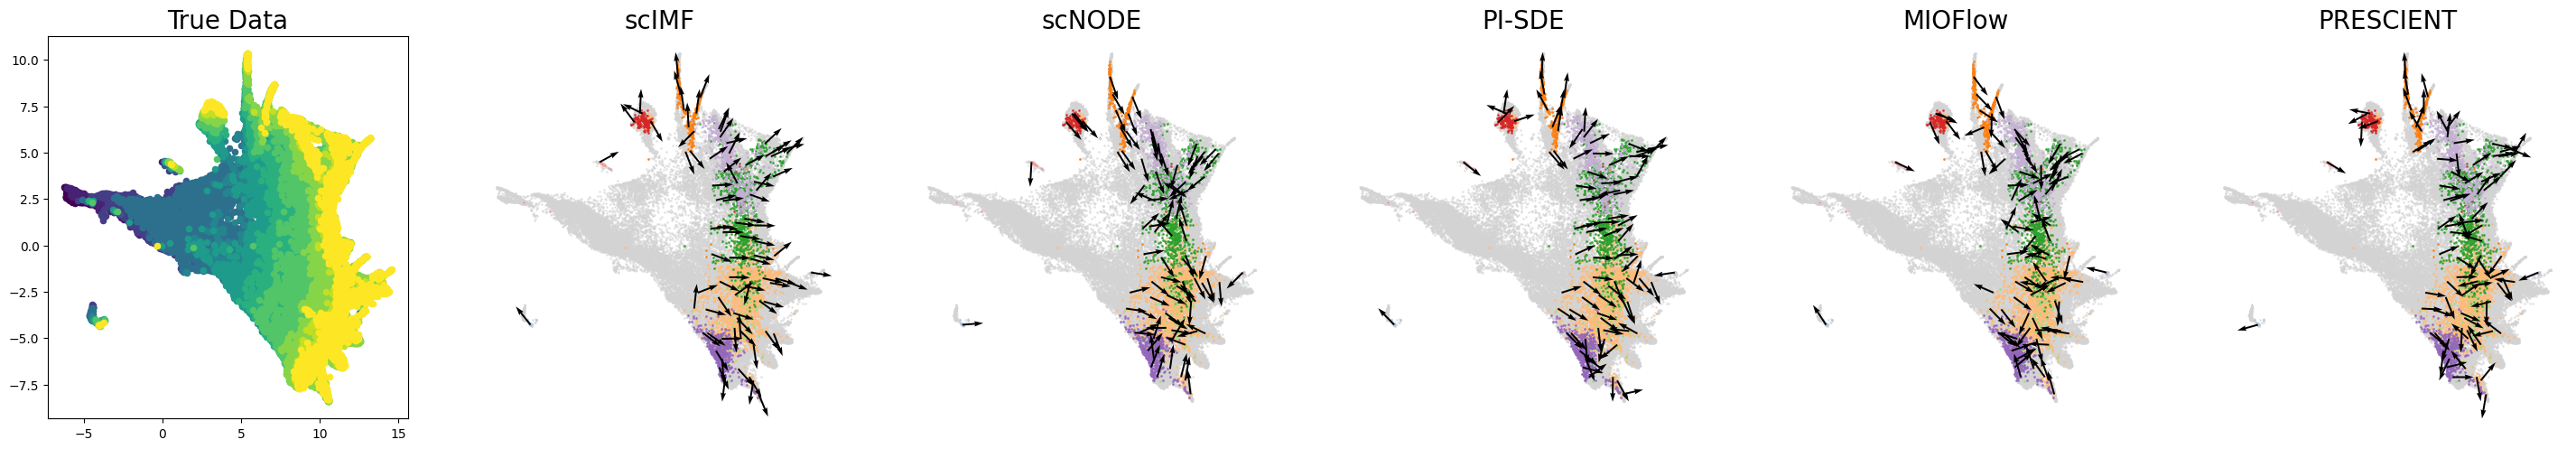

In [ ]:
time_constrain = 8
selected_indices = return_Indexes(true_umap, true_cell_tps, cell_types, grid_size=1, time_constrain=time_constrain, celltype_constrain=None,seed_num = 0)
plotVectorAllTime_Compare(true_umap, true_cell_tps, cell_types, endes_umapS, selected_indices, models, useOneNorm = True, v_scale=[2,2,2,2,2], time_constrain=time_constrain, celltype_constrain=None)